In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
N = 64 * 64 # required image size

In [3]:
def image_to_np(path):
    im = Image.open(path)
    im_np = np.asarray(im)
    im_np = im_np[:, :, 0]
    im_np = np.where(im_np<128, -1, 1)
    im_np = im_np.reshape(N)
    return im_np

In [4]:
memory = np.asarray([image_to_np(os.path.join('images', '1.jpg')),
                     image_to_np(os.path.join('images', '2.jpg')),
                     image_to_np(os.path.join('images', '3.jpg')),
                     image_to_np(os.path.join('images', '4.jpg'))])  
print(memory)

[[ 1  1  1 ...  1  1  1]
 [ 1  1  1 ...  1  1  1]
 [ 1  1  1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]]


In [5]:
N = memory.shape[1]
P = memory.shape[0]
print(P)
print(N)

4
4096


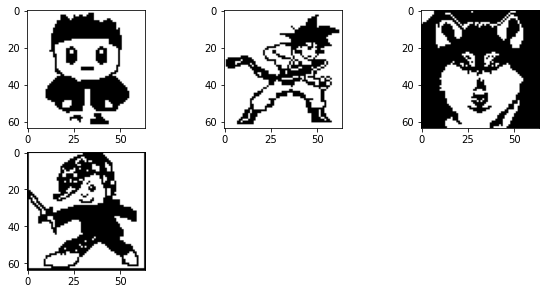

In [6]:
N_sqrt = np.sqrt(N).astype('int32')

fig = plt.figure(figsize = (10, 10))
for img, i in enumerate(memory):
    plt.subplot(4, 3,img+1)
    plt.imshow(np.where(i.reshape(N_sqrt, N_sqrt)<1, 0, 1), cmap='gray')

In [7]:
# Generate the Weight matrix
w = np.zeros((N,N)) 
for i in range(N):
    for j in range(N):
        for p in range(P):
            w[i, j] += (memory[p, i]*memory[p, j]).sum()
w /= N
np.fill_diagonal(w, 0)
print(w)

[[0.         0.00097656 0.00097656 ... 0.00048828 0.00048828 0.00048828]
 [0.00097656 0.         0.00097656 ... 0.00048828 0.00048828 0.00048828]
 [0.00097656 0.00097656 0.         ... 0.00048828 0.00048828 0.00048828]
 ...
 [0.00048828 0.00048828 0.00048828 ... 0.         0.00097656 0.00097656]
 [0.00048828 0.00048828 0.00048828 ... 0.00097656 0.         0.00097656]
 [0.00048828 0.00048828 0.00048828 ... 0.00097656 0.00097656 0.        ]]


Image Should be restored to the pattern:  3


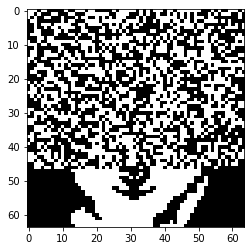

In [8]:
# Select one pattern from the memory and currupt it for testing
select_pattern = np.random.randint(P)
test_array = memory[select_pattern]
random_test_array = np.random.choice([1, -1], 3000)
test_array[:3000] = random_test_array

plt.imshow(test_array.reshape(N_sqrt, N_sqrt), cmap='gray')

print('Image Should be restored to the pattern: ', select_pattern+1)

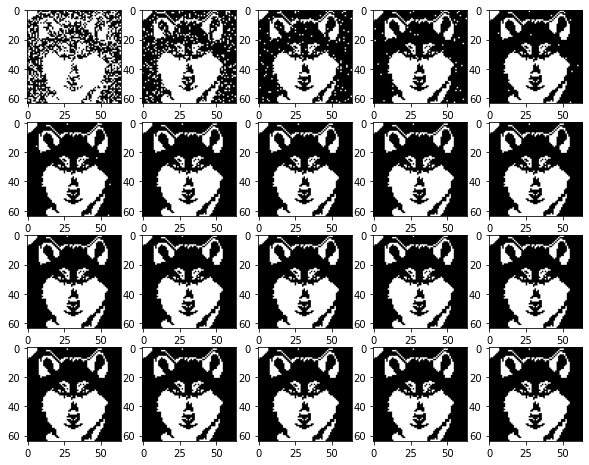

In [9]:
iteration = 20
h = np.zeros((N))
fig = plt.figure(figsize = (10, 10))
for iter in range(iteration):
    for i in range(N):
        i = np.random.randint(N)
        h[i] = 0
        for j in range(N):
            h[i] += w[i, j]*test_array[j]
    test_array = np.where(h<0, -1, 1)
#     print(test_array.shape)

    plt.subplot(5, 5,iter+1)
    plt.imshow(np.where(test_array.reshape(N_sqrt, N_sqrt)<1, 0, 1), cmap='gray')